                died  survived  row_total
post_discovery     1        11         12
pre_discovery      6         6         12
column_total       7        17         24

Manually calculated Fisher's Exact Test P-value (one-tailed) = 0.034325

scipy.stats Fisher's exact result: p-value (one-tailed) = 0.034325 | Odds Ratio = 0.090909

The result was statistically significant. The observed distribution is unlikely to have occurred under the null hypothesis (of equiprobability).


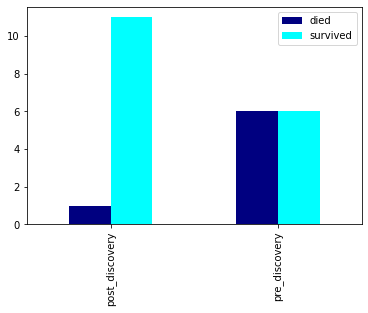

In [19]:
import numpy as np
import scipy.stats
import math
import statistics as stats
import pandas as pd
import matplotlib.pyplot as plt

# data obtained from http://users.stat.ufl.edu/~winner/data/lister_ul.dat

# information from data (from http://users.stat.ufl.edu/~winner/data/lister_ul.txt ):

# 'Dataset:  lister_ul.dat
# Source: Lister (1870). Effects of the Antiseptic System of Treatment
# Upon the Salubrity of a Surgical Hospital. The Lancet, 1:4-6,40-42.

# Description: Results on survival of Upper Limb amputees prior to and
# after discovery and use of antiseptic.''

# Variables:
# Aniseptic (1=Post-Discovery,0=Pre-discovery)
# Death (1=Yes,0=No)
# Count (Number of cases)

dict1 = {'antiseptic': [1,1,0,0], 'death': [1, 0, 1, 0], 'count': [1,11,6,6]}

dframe = pd.DataFrame(dict1)

count_data = np.array([dframe['count'][0:2], dframe['count'][2:5]])

dframe_2 = pd.DataFrame(count_data, columns = ['died', 'survived'])
dframe_2.index=['post_discovery', 'pre_discovery']

dframe_2.loc['column_total']= dframe_2.sum(numeric_only=True, axis=0)
dframe_2.loc[:,'row_total'] = dframe_2.sum(numeric_only=True, axis=1)
print(dframe_2)

# calculating the probability of obtaining exactly the observed distribution

fac = math.factorial

n1 = dframe_2['row_total'][2]

k1 = dframe_2['died'][2]

nck1 = fac(n1)/(fac(k1)*fac(n1-k1))


n2 = dframe_2['row_total'][0]

k2 = dframe_2['died'][0]

nck2 = fac(n2)/(fac(k2)*fac(n2-k2))


n3 = dframe_2['row_total'][1]

k3 = dframe_2['died'][1]

nck3 = fac(n3)/(fac(k3)*fac(n3-k3))


# calculating the probability of a more extreme distribution than the one obtained

dict_ex = {'antiseptic': [1,1,0,0], 'death': [1, 0, 1, 0], 'count': [0,12,7,5]}

dframe_ex = pd.DataFrame(dict_ex)

count_data2 = np.array([dframe_ex['count'][0:2], dframe_ex['count'][2:5]])

dframe_ex2 = pd.DataFrame(count_data2, columns = ['died', 'survived'])
dframe_ex2.index=['post_discovery', 'pre_discovery']

dframe_ex2.loc['column_total']= dframe_ex2.sum(numeric_only=True, axis=0)
dframe_ex2.loc[:,'row_total'] = dframe_ex2.sum(numeric_only=True, axis=1)


n1ex = dframe_ex2['row_total'][2]

k1ex = dframe_ex2['died'][2]

nck1ex = fac(n1ex)/(fac(k1ex)*fac(n1ex-k1ex))


n2ex = dframe_ex2['row_total'][0]

k2ex = dframe_ex2['died'][0]

nck2ex = fac(n2ex)/(fac(k2ex)*fac(n2ex-k2ex))


n3ex = dframe_ex2['row_total'][1]

k3ex = dframe_ex2['died'][1]

nck3ex = fac(n3ex)/(fac(k3ex)*fac(n3ex-k3ex))

# calculating Fisher's exact test

fisher_result = ((nck2*nck3)/nck1) + ((nck2ex*nck3ex)/nck1ex)

print()
print("Manually calculated Fisher's Exact Test P-value (one-tailed) =", round(fisher_result, 6))
print()

# checking the result with scipy.stats Fisher's exact test

dframe_3 = pd.DataFrame(count_data, columns = ['died', 'survived'])
dframe_3.index=['post_discovery', 'pre_discovery']

#checking the result with scipy.stats

result = scipy.stats.fisher_exact(dframe_3, alternative = 'less')

print("scipy.stats Fisher's exact result: p-value (one-tailed) =", round(result[1], 6), '| ' 'Odds Ratio =', round(result[0],6))

if result[1] <= 0.05:
    print()
    print('The result was statistically significant. The observed distribution is unlikely to have occurred under the null hypothesis (of equiprobability).')
else:
    print()
    print('The result was not statistically significant.')
    
# plotting the data

dframe_3.plot.bar(color = ['navy', 'cyan'])